In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from scipy import stats

df_test = pd.read_csv("C:/Users/Mario/Desktop/UniPi/1° semestre/Data Mining 1/Datasets/DatasetProject1/Test_HR_Employee_Attrition.csv")
df_train = pd.read_csv("C:/Users/Mario/Desktop/UniPi/1° semestre/Data Mining 1/Datasets/DatasetProject1/Train_HR_Employee_Attrition.csv")

frame = [df_test, df_train]
df3 = pd.concat(frame)
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,27.0,Yes,Travel_Frequently,763,Sales,15,2,Medical,1,Male,...,4,80.0,2,7,1.0,2,2.0,2,2,2
1,30.0,Yes,Travel_Rarely,1079,Sales,16,4,Marketing,1,Male,...,1,NaN,3,10,2.0,3,8.0,0,0,0
2,56.0,No,Non-Travel,150,Research & Development,2,4,Technical Degree,4,Male,...,3,80.0,1,12,2.0,2,13.0,3,1,4
3,41.0,Yes,NaN,359,Human Resources,18,5,Human Resources,4,Male,...,3,80.0,0,2,4.0,3,3.0,0,0,0
4,42.0,No,NaN,642,Research & Development,1,3,Life Sciences,4,Male,...,1,NaN,1,12,6.0,3,5.0,3,1,0


**DATA UNDERSTANDING**

In [2]:
#HO AGGIUNTO PER PROVA "MonthlyIncome", "YearsWithCurrManager", "YearsSinceLastPromotion", "TrainingTimesLastYear", "NumCompaniesWorked", "MaritalStatus"
       
new_df = df3[['Age', 'Attrition', 'BusinessTravel',  'Department', 'DistanceFromHome', 'Education', 'EducationField','HourlyRate',
       'EnvironmentSatisfaction','Gender',  'JobLevel',  'JobSatisfaction', 'OverTime', 'PercentSalaryHike',
       'TotalWorkingYears', 'WorkLifeBalance',  'YearsAtCompany', 'YearsInCurrentRole', "MonthlyIncome", "YearsWithCurrManager", 
        "YearsSinceLastPromotion", "TrainingTimesLastYear", "NumCompaniesWorked", "MaritalStatus", "PerformanceRating"]]

new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyIncome,YearsWithCurrManager,YearsSinceLastPromotion,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating
0,27.0,Yes,Travel_Frequently,Sales,15,2,Medical,59,1,Male,...,2,2.0,2,4298.0,2,2,1.0,6,Divorced,3.0
1,30.0,Yes,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,...,3,8.0,0,5304.0,0,0,2.0,2,Married,4.0
2,56.0,No,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,...,2,13.0,3,6306.0,4,1,2.0,2,Divorced,4.0
3,41.0,Yes,NaN,Human Resources,18,5,Human Resources,89,4,Male,...,3,3.0,0,6430.0,0,0,4.0,0,Married,3.0
4,42.0,No,NaN,Research & Development,1,3,Life Sciences,76,4,Male,...,3,5.0,3,2766.0,0,1,6.0,3,Married,4.0


In [3]:
new_df = new_df.replace(to_replace="Yes", value=1, inplace=False, limit=None, regex=False, method='pad')
new_df = new_df.replace(to_replace="No", value=0, inplace=False, limit=None, regex=False, method='pad')

new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyIncome,YearsWithCurrManager,YearsSinceLastPromotion,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating
0,27.0,1,Travel_Frequently,Sales,15,2,Medical,59,1,Male,...,2,2.0,2,4298.0,2,2,1.0,6,Divorced,3.0
1,30.0,1,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,...,3,8.0,0,5304.0,0,0,2.0,2,Married,4.0
2,56.0,0,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,...,2,13.0,3,6306.0,4,1,2.0,2,Divorced,4.0
3,41.0,1,NaN,Human Resources,18,5,Human Resources,89,4,Male,...,3,3.0,0,6430.0,0,0,4.0,0,Married,3.0
4,42.0,0,NaN,Research & Development,1,3,Life Sciences,76,4,Male,...,3,5.0,3,2766.0,0,1,6.0,3,Married,4.0


In [4]:
#Vedere se spostare quuesto blocco nella sezione Variable Transformation
new_df = new_df.replace(to_replace="Divorced", value=0, inplace=False, limit=None, regex=False, method='pad')
new_df = new_df.replace(to_replace="Married", value=2, inplace=False, limit=None, regex=False, method='pad')
new_df = new_df.replace(to_replace="Single", value=1, inplace=False, limit=None, regex=False, method='pad')

new_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,HourlyRate,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyIncome,YearsWithCurrManager,YearsSinceLastPromotion,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating
0,27.0,1,Travel_Frequently,Sales,15,2,Medical,59,1,Male,...,2,2.0,2,4298.0,2,2,1.0,6,0,3.0
1,30.0,1,Travel_Rarely,Sales,16,4,Marketing,70,1,Male,...,3,8.0,0,5304.0,0,0,2.0,2,2,4.0
2,56.0,0,Non-Travel,Research & Development,2,4,Technical Degree,60,4,Male,...,2,13.0,3,6306.0,4,1,2.0,2,0,4.0
3,41.0,1,NaN,Human Resources,18,5,Human Resources,89,4,Male,...,3,3.0,0,6430.0,0,0,4.0,0,2,3.0
4,42.0,0,NaN,Research & Development,1,3,Life Sciences,76,4,Male,...,3,5.0,3,2766.0,0,1,6.0,3,2,4.0


In [5]:
#Percentuale di valori mancanti per ogni colonna
round((new_df.isnull().sum()/len(new_df))*100, 2) 

Age                        14.42
Attrition                   0.00
BusinessTravel              8.91
Department                  0.00
DistanceFromHome            0.00
Education                   0.00
EducationField              0.00
HourlyRate                  0.00
EnvironmentSatisfaction     0.00
Gender                      5.10
JobLevel                    0.00
JobSatisfaction             0.00
OverTime                    0.00
PercentSalaryHike           0.00
TotalWorkingYears           0.00
WorkLifeBalance             0.00
YearsAtCompany              5.03
YearsInCurrentRole          0.00
MonthlyIncome              19.05
YearsWithCurrManager        0.00
YearsSinceLastPromotion     0.00
TrainingTimesLastYear      19.86
NumCompaniesWorked          0.00
MaritalStatus               0.00
PerformanceRating          11.70
dtype: float64

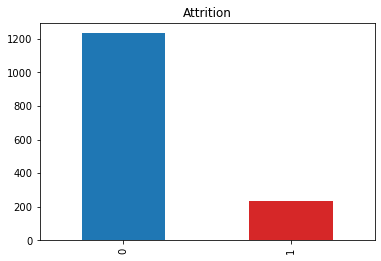

In [6]:
new_df["Attrition"].value_counts().plot(kind='bar', color=("C0", "C3")).set_title("Attrition")
plt.show()

In [7]:
new_df.shape

(1470, 25)

In [8]:
new_df.describe()

,Age,Attrition,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,JobLevel,JobSatisfaction,OverTime,PercentSalaryHike,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyIncome,YearsWithCurrManager,YearsSinceLastPromotion,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating
count,1258.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1396.000000,1470.000000,1190.000000,1470.000000,1470.000000,1178.000000,1470.000000,1470.000000,1298.000000
mean,37.115262,0.161224,9.192517,2.912925,65.891156,2.721769,2.063946,2.728571,0.282993,15.209524,...,2.761224,6.942693,4.229252,6548.915966,4.123129,2.187755,2.810696,2.693197,1.235374,3.154083
std,9.068654,0.367863,8.106864,1.024165,20.329428,1.093082,1.106940,1.102846,0.450606,3.659938,...,0.706476,6.033444,3.623137,4732.775331,3.568136,3.222430,1.302499,2.498009,0.790757,0.361168
min,18.000000,0.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,...,1.000000,0.000000,0.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,30.000000,0.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,0.000000,12.000000,...,2.000000,3.000000,2.000000,2973.250000,2.000000,0.000000,2.000000,1.000000,1.000000,3.000000
50%,36.000000,0.000000,7.000000,3.000000,66.000000,3.000000,2.000000,3.000000,0.000000,14.000000,...,3.000000,5.000000,3.000000,4907.500000,3.000000,1.000000,3.000000,2.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,83.750000,4.000000,3.000000,4.000000,1.000000,18.000000,...,3.000000,9.000000,7.000000,8437.500000,7.000000,3.000000,3.000000,4.000000,2.000000,3.000000
max,60.000000,1.000000,29.000000,5.000000,100.000000,4.000000,5.000000,4.000000,1.000000,25.000000,...,4.000000,40.000000,18.000000,19999.000000,17.000000,15.000000,6.000000,9.000000,2.000000,4.000000


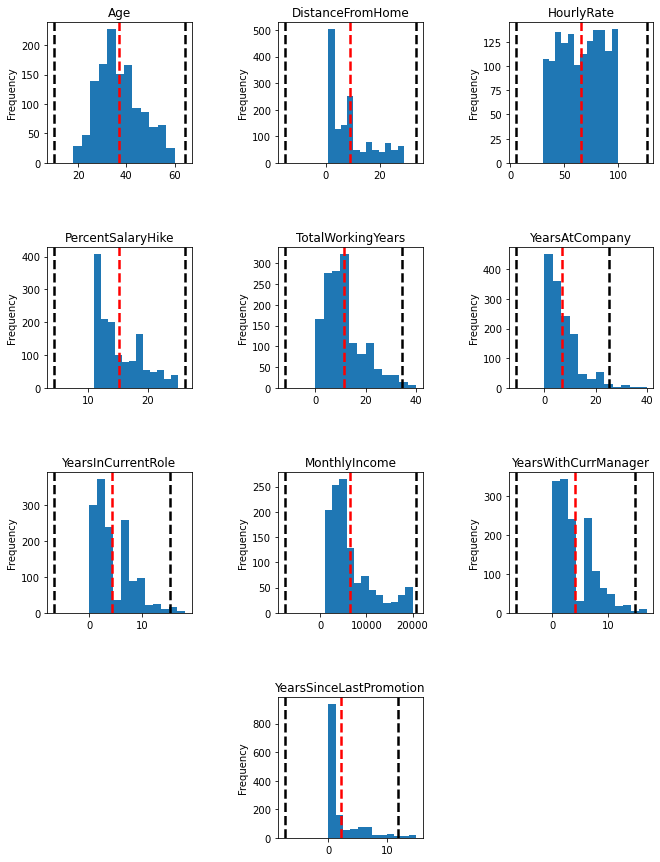

In [9]:
# Set up a grid of plots
fig = plt.figure(figsize=(15, 15)) 
fig_dims = (4,4)
fig.subplots_adjust(hspace=0.6, wspace=0.6)

# Plot Age
plt.subplot2grid(fig_dims, (0,0))
new_df['Age'].plot(kind='hist', title='Age', bins=12)
plt.axvline(x=new_df["Age"].mean(), linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.axvline(x=new_df["Age"].mean() + 3*new_df["Age"].std(), linestyle='--', linewidth=2.5, color="black", label="Upper")
plt.axvline(x=new_df["Age"].mean() - 3*new_df["Age"].std(), linestyle='--', linewidth=2.5, color="black", label="Lower")

# Plot DistanceFromHome
plt.subplot2grid(fig_dims, (0,1))
new_df['DistanceFromHome'].plot(kind='hist', title='DistanceFromHome', bins=12)
plt.axvline(x=new_df["DistanceFromHome"].mean(), linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.axvline(x=new_df["DistanceFromHome"].mean() + 3*new_df["DistanceFromHome"].std(), linestyle='--', linewidth=2.5, color="black", label="Upper")
plt.axvline(x=new_df["DistanceFromHome"].mean() - 3*new_df["DistanceFromHome"].std(), linestyle='--', linewidth=2.5, color="black", label="Lower")

# Plot HourlyRate
plt.subplot2grid(fig_dims, (0,2))
new_df['HourlyRate'].plot(kind='hist', title='HourlyRate', bins=12)
plt.axvline(x=new_df["HourlyRate"].mean(), linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.axvline(x=new_df["HourlyRate"].mean() + 3*new_df["HourlyRate"].std(), linestyle='--', linewidth=2.5, color="black", label="Upper")
plt.axvline(x=new_df["HourlyRate"].mean() - 3*new_df["HourlyRate"].std(), linestyle='--', linewidth=2.5, color="black", label="Lower")

# Plot PercentSalaryHike
plt.subplot2grid(fig_dims, (1,0))
new_df['PercentSalaryHike'].plot(kind='hist', title='PercentSalaryHike', bins=12)
plt.axvline(x=new_df["PercentSalaryHike"].mean(), linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.axvline(x=new_df["PercentSalaryHike"].mean() + 3*new_df["PercentSalaryHike"].std(), linestyle='--', linewidth=2.5, color="black", label="Upper")
plt.axvline(x=new_df["PercentSalaryHike"].mean() - 3*new_df["PercentSalaryHike"].std(), linestyle='--', linewidth=2.5, color="black", label="Lower")

# Plot TotalWorkingYears
plt.subplot2grid(fig_dims, (1,1))
new_df['TotalWorkingYears'].plot(kind='hist', title='TotalWorkingYears', bins=12)
plt.axvline(x=new_df["TotalWorkingYears"].mean(), linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.axvline(x=new_df["TotalWorkingYears"].mean() + 3*new_df["TotalWorkingYears"].std(), linestyle='--', linewidth=2.5, color="black", label="Upper")
plt.axvline(x=new_df["TotalWorkingYears"].mean() - 3*new_df["TotalWorkingYears"].std(), linestyle='--', linewidth=2.5, color="black", label="Lower")

# Plot YearsAtCompany
plt.subplot2grid(fig_dims, (1,2))
new_df['YearsAtCompany'].plot(kind='hist', title='YearsAtCompany', bins=12)
plt.axvline(x=new_df["YearsAtCompany"].mean(), linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.axvline(x=new_df["YearsAtCompany"].mean() + 3*new_df["YearsAtCompany"].std(), linestyle='--', linewidth=2.5, color="black", label="Upper")
plt.axvline(x=new_df["YearsAtCompany"].mean() - 3*new_df["YearsAtCompany"].std(), linestyle='--', linewidth=2.5, color="black", label="Lower")

# Plot YearsInCurrentRole
plt.subplot2grid(fig_dims, (2,0))
new_df['YearsInCurrentRole'].plot(kind='hist', title='YearsInCurrentRole', bins=12)
plt.axvline(x=new_df["YearsInCurrentRole"].mean(), linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.axvline(x=new_df["YearsInCurrentRole"].mean() + 3*new_df["YearsInCurrentRole"].std(), linestyle='--', linewidth=2.5, color="black", label="Upper")
plt.axvline(x=new_df["YearsInCurrentRole"].mean() - 3*new_df["YearsInCurrentRole"].std(), linestyle='--', linewidth=2.5, color="black", label="Lower")

# Plot MonthlyIncome
plt.subplot2grid(fig_dims, (2,1))
new_df['MonthlyIncome'].plot(kind='hist', title='MonthlyIncome', bins=12)
plt.axvline(x=new_df["MonthlyIncome"].mean(), linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.axvline(x=new_df["MonthlyIncome"].mean() + 3*new_df["MonthlyIncome"].std(), linestyle='--', linewidth=2.5, color="black", label="Upper")
plt.axvline(x=new_df["MonthlyIncome"].mean() - 3*new_df["MonthlyIncome"].std(), linestyle='--', linewidth=2.5, color="black", label="Lower")

# Plot YearsWithCurrManager
plt.subplot2grid(fig_dims, (2,2))
new_df['YearsWithCurrManager'].plot(kind='hist', title='YearsWithCurrManager', bins=12)
plt.axvline(x=new_df["YearsWithCurrManager"].mean(), linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.axvline(x=new_df["YearsWithCurrManager"].mean() + 3*new_df["YearsWithCurrManager"].std(), linestyle='--', linewidth=2.5, color="black", label="Upper")
plt.axvline(x=new_df["YearsWithCurrManager"].mean() - 3*new_df["YearsWithCurrManager"].std(), linestyle='--', linewidth=2.5, color="black", label="Lower")

# Plot YearsSinceLastPromotion
plt.subplot2grid(fig_dims, (3,1))
new_df['YearsSinceLastPromotion'].plot(kind='hist', title='YearsSinceLastPromotion', bins=12)
plt.axvline(x=new_df["YearsSinceLastPromotion"].mean(), linestyle='--', linewidth=2.5, color="red", label="Mean")
plt.axvline(x=new_df["YearsSinceLastPromotion"].mean() + 3*new_df["YearsSinceLastPromotion"].std(), linestyle='--', linewidth=2.5, color="black", label="Upper")
plt.axvline(x=new_df["YearsSinceLastPromotion"].mean() - 3*new_df["YearsSinceLastPromotion"].std(), linestyle='--', linewidth=2.5, color="black", label="Lower")

plt.show()

fig.savefig(fname="istogrammi")

**DATA QUALITY**

In [10]:
corrMatrix = new_df.corr()
corrMatrix.head()

,Age,Attrition,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,JobLevel,JobSatisfaction,OverTime,PercentSalaryHike,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyIncome,YearsWithCurrManager,YearsSinceLastPromotion,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating
Age,1.000000,-0.014636,0.015202,0.007189,0.035321,0.022005,0.025911,-0.060127,-0.030357,-0.019252,...,0.018151,0.317141,0.028593,0.516530,0.004606,0.005130,-0.017919,-0.011009,-0.017614,-0.006773
Attrition,-0.014636,1.000000,0.077924,-0.031373,-0.006846,-0.103369,-0.169105,-0.103481,0.246118,-0.013478,...,-0.063939,0.025215,-0.160545,-0.000596,-0.156199,-0.033019,-0.030096,0.043494,-0.011195,0.021303
DistanceFromHome,0.015202,0.077924,1.000000,0.021042,0.031131,-0.016075,0.005303,-0.003669,0.025514,0.040235,...,-0.026556,0.023703,0.018845,0.000934,0.014406,0.010029,0.006346,-0.029251,0.021916,-0.029054
Education,0.007189,-0.031373,0.021042,1.000000,0.016775,-0.027128,0.101589,-0.011296,-0.020322,-0.011111,...,0.009819,0.031169,0.060236,0.005028,0.069065,0.054254,0.000263,0.126317,0.000107,0.036321
HourlyRate,0.035321,-0.006846,0.031131,0.016775,1.000000,-0.049857,-0.027853,-0.071335,-0.007782,-0.009062,...,-0.004607,0.003561,-0.024106,-0.011316,-0.020123,-0.026716,-0.011816,0.022157,0.026198,0.005241


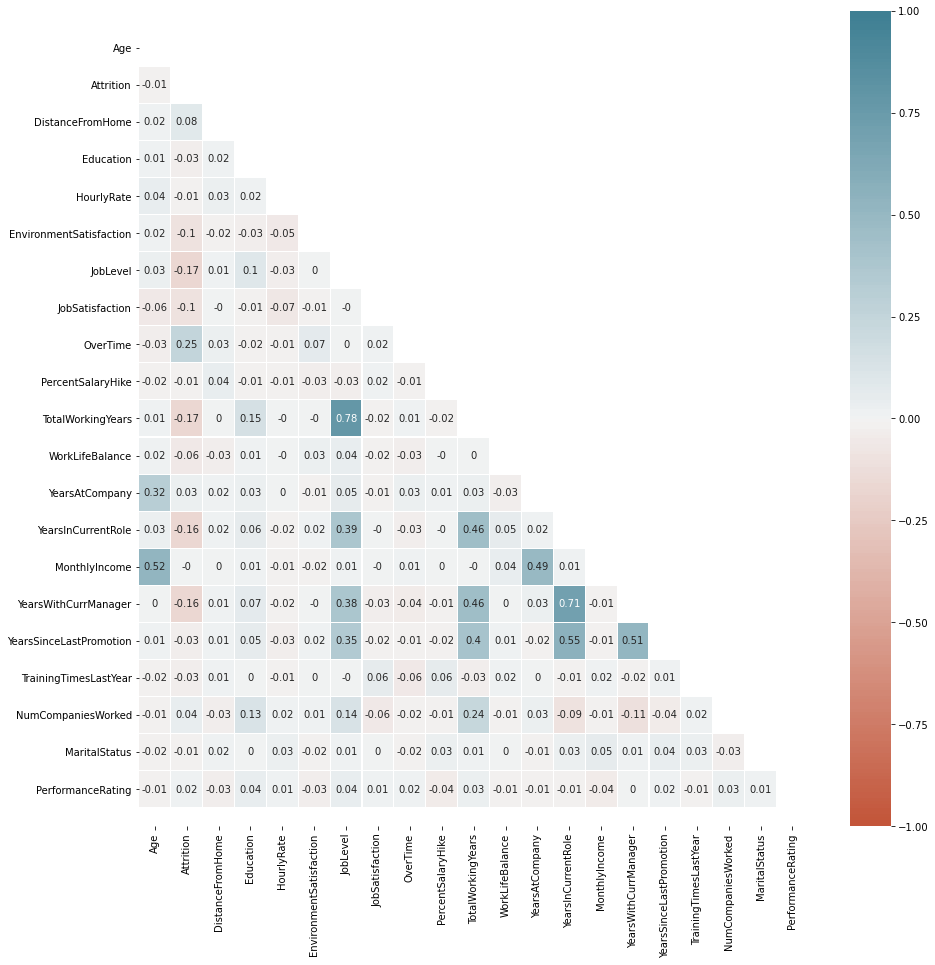

In [11]:
#Provare ad aggiungere delle colonne che abbiamo rimosso per vedere la correlazione con Attrition (corr molto basse)

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
fig, ax = plt.subplots(figsize=(15,15))

sn.heatmap(
    corrMatrix.round(2), 
    annot=True,
    annot_kws={"size":10},
    cmap=sn.diverging_palette(20, 220, n=200), 
    vmin=-1, 
    vmax=1, 
    center=0,
    linewidth=0.1,
    mask=mask,
    ax=ax)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

plt.show()

fig.savefig("corrMat_con")

In [12]:
male_df = new_df[new_df["Gender"] == "Male"]
male_df["MonthlyIncome"].median()

4865.5

In [13]:
female_df = new_df[new_df["Gender"] == "Female"]
female_df["MonthlyIncome"].median()

5107.0

In [14]:
medie = new_df.groupby(new_df["Attrition"])
medie.mean()

,Age,DistanceFromHome,Education,HourlyRate,EnvironmentSatisfaction,JobLevel,JobSatisfaction,OverTime,PercentSalaryHike,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,MonthlyIncome,YearsWithCurrManager,YearsSinceLastPromotion,TrainingTimesLastYear,NumCompaniesWorked,MaritalStatus,PerformanceRating
Attrition,,,,,,,,,,,,,,,,,,,,
0,37.173460,8.915653,2.927007,65.952149,2.771290,2.145985,2.778589,0.234388,15.231144,11.862936,2.781022,6.876385,4.484185,6550.136727,4.367397,2.234388,2.827173,2.645580,1.239254,3.150647
1,36.812808,10.632911,2.839662,65.573840,2.464135,1.637131,2.468354,0.535865,15.097046,8.244726,2.658228,7.291480,2.902954,6542.409574,2.852321,1.945148,2.717514,2.940928,1.215190,3.171296
